In [ ]:
!pip install pmdarima yfinance tensorflow scikit-learn matplotlib

# Importing Libraries and Load TSLA

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the data
data = yf.download("TSLA", start="2015-01-01", end="2025-01-31")
data = data[['Close']]  # Select only the 'Close' price
data.columns = ['TSLA']  # Rename for convenience

# Ensure the index is a datetime and set frequency
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')  # Adjust frequency as needed

# Handle missing values (if any)
data = data.interpolate()  # Interpolate to fill NaNs


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


# Time series forecasting

In [3]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Auto ARIMA model selection
auto_arima_model = auto_arima(train["TSLA"], seasonal=False, trace=True, stepwise=True)

# Fit ARIMA Model
p, d, q = auto_arima_model.order
arima_model = ARIMA(train["TSLA"], order=(p, d, q))
arima_result = arima_model.fit()

# Forecast
forecast_steps = len(test)
forecast = arima_result.forecast(steps=forecast_steps)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16520.979, Time=4.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16577.410, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16563.567, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16565.809, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16575.758, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16547.592, Time=1.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16548.328, Time=0.83 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16499.449, Time=5.34 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16549.481, Time=3.38 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=16499.869, Time=8.84 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=16522.605, Time=9.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16544.056, Time=3.98 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16550.664, Time=2.86 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=16483.703, Time=9.80 sec
 ARIMA(5,1,3)(0,0,0

# Evaluation

In [4]:
# Evaluate Model
mae = mean_absolute_error(test["TSLA"], forecast)
rmse = np.sqrt(mean_squared_error(test["TSLA"], forecast))

# Avoid division by zero in MAPE calculation
if np.any(test["TSLA"] == 0):
    mape = np.nan
else:
    mape = np.mean(np.abs((test["TSLA"] - forecast) / test["TSLA"])) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

MAE: 90.92873490022268
RMSE: 112.46153929156637
MAPE: 34.79894969319255


# Visualization

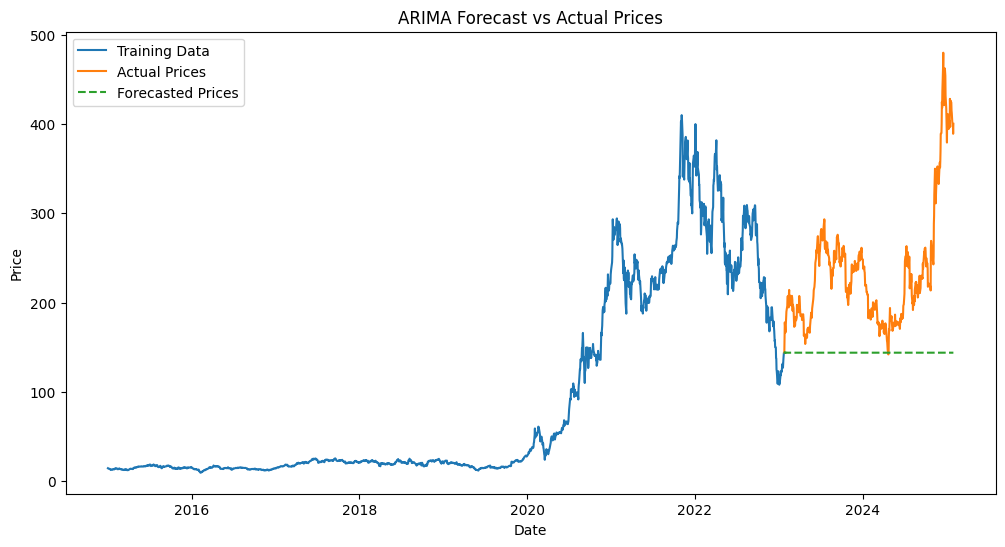

In [5]:
# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train["TSLA"], label="Training Data")
plt.plot(test.index, test["TSLA"], label="Actual Prices")
plt.plot(test.index, forecast, label="Forecasted Prices", linestyle="dashed")
plt.legend()
plt.title("ARIMA Forecast vs Actual Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Short Summary

I build and evaluate a time series forecasting model for predicting Tesla's stock prices using ARIMA.

Model Selection:

* Various ARIMA models were evaluated using stepwise search to minimize the Akaike Information Criterion (AIC).
* The best-performing model identified was ARIMA(4,1,4), with an AIC of 16463.058.


Evaluation Metrics:

* Mean Absolute Error (MAE): 90.93 which indicates the average magnitude of errors in a set of forecasts, without considering their direction.

* Root Mean Squared Error (RMSE): 112.46 which provides a measure of how spread out these residuals are, emphasizing larger errors due to squaring.

* Mean Absolute Percentage Error (MAPE): 34.80% which expresses accuracy as a percentage, which can be useful for understanding the error relative to the actual values.